In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_excel("EastWestAirlines.xlsx", sheet_name="data")

data = data.dropna()

print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None
               ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     

In [2]:
# Checking for the categorical variables

data_types = data.dtypes

categorical_columns = data_types[data_types == 'object'].index.tolist()

# Print the columns with categorical values
print("Columns with categorical values:", categorical_columns)

Columns with categorical values: []


In [3]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data.drop(['ID#'], axis=1))

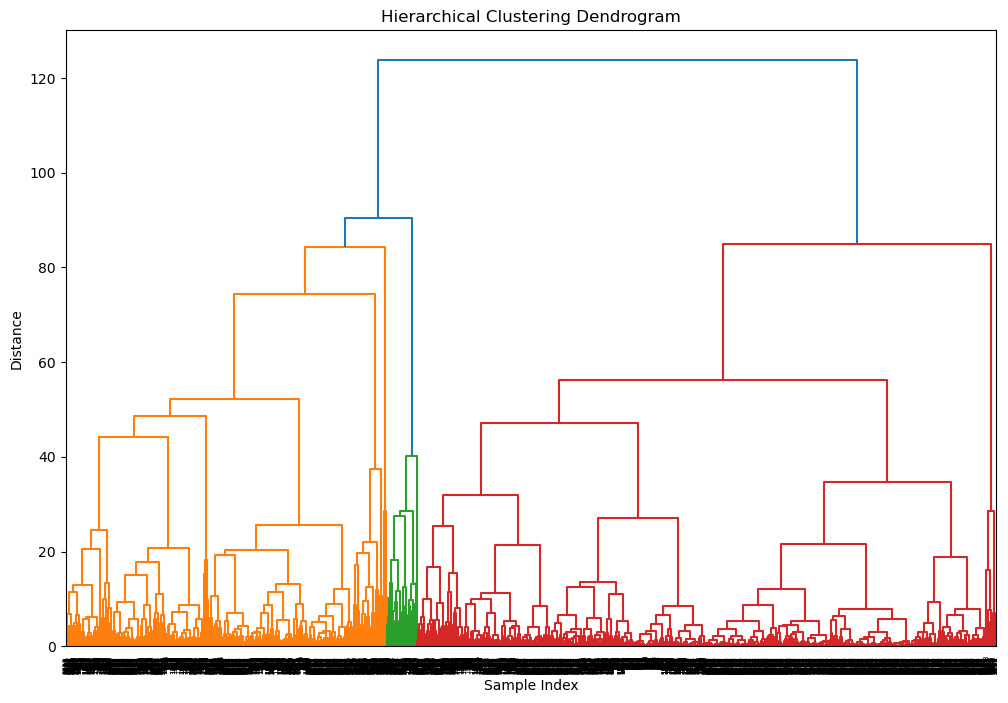

In [4]:
# Hierarchical Clustering
linked = linkage(normalized_data, 'ward')

# Dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [5]:
# Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, distance_threshold=None, linkage='ward')
agg_labels = agg_clustering.fit_predict(normalized_data)

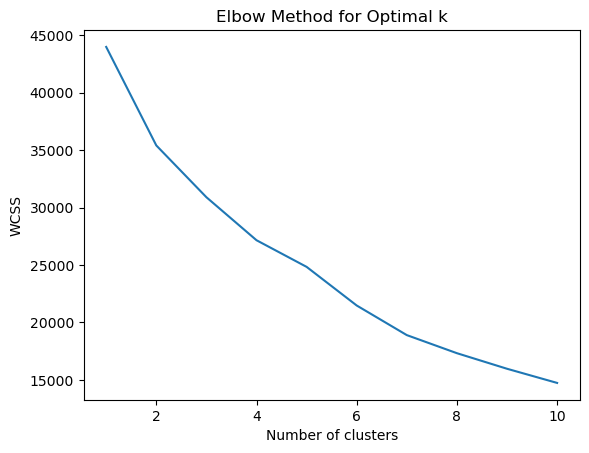

In [6]:
# K-means Clustering
# Using the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(normalized_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method to find the optimal number of clusters for K-means
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

In [7]:
# Based on the Elbow method, choosing the optimal number of clusters for K-means
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_labels = kmeans.fit_predict(normalized_data)

In [8]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(normalized_data)

In [9]:
# Evaluate clustering using silhouette score
silhouette_agg = silhouette_score(normalized_data, agg_labels)
silhouette_kmeans = silhouette_score(normalized_data, kmeans_labels)
silhouette_dbscan = silhouette_score(normalized_data, dbscan_labels)

# Print silhouette scores
print(f'Silhouette Score (Hierarchical Clustering): {silhouette_agg}')
print(f'Silhouette Score (K-means Clustering): {silhouette_kmeans}')
print(f'Silhouette Score (DBSCAN Clustering): {silhouette_dbscan}')

# Add the cluster labels to the original data for analysis
data['Agg_Cluster'] = agg_labels
data['KMeans_Cluster'] = kmeans_labels
data['DBSCAN_Cluster'] = dbscan_labels

Silhouette Score (Hierarchical Clustering): 0.2940432062008608
Silhouette Score (K-means Clustering): 0.31191384766627117
Silhouette Score (DBSCAN Clustering): 0.5420774278401335


In [10]:
num_clusters_agg = len(np.unique(agg_labels[agg_labels != -1]))
num_clusters_kmeans = kmeans.n_clusters
num_clusters_dbscan = len(np.unique(dbscan_labels[dbscan_labels != -1]))


print("Number of Clusters (Hierarchical Clustering):", num_clusters_agg)
print("Number of Clusters (K-means Clustering):", num_clusters_kmeans)
print("Number of Clusters (DBScan Clustering):", num_clusters_dbscan)

Number of Clusters (Hierarchical Clustering): 3
Number of Clusters (K-means Clustering): 3
Number of Clusters (DBScan Clustering): 3


In [11]:
# Drawing inferences from the clusters obtained.

hierarchical_cluster_means = data.groupby('Agg_Cluster').mean()
KMeans_cluster_means = data.groupby('KMeans_Cluster').mean()
DBSCAN_cluster_means = data.groupby('DBSCAN_Cluster').mean()

# Display the cluster means
print("hierarchical_cluster_means")
print("")
print(hierarchical_cluster_means)
print("")
print("")

print("KMeans_cluster_means")
print("")
print(KMeans_cluster_means)
print("")
print("")

print("DBSCAN_cluster_means")
print("")
print(DBSCAN_cluster_means)
print("")
print("")

hierarchical_cluster_means

                     ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
Agg_Cluster                                                                 
0            2198.450783   46718.863399    9.274407   1.242266   1.023303   
1            1707.093478  116314.450725  363.839130   3.498551   1.000000   
2            1765.615385  134880.892308  393.323077   2.430769   1.000000   

             cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Agg_Cluster                                                            
0             1.000000   5037.792688     7.091201         221.167135   
1             1.035507  37150.356522    18.066667         377.000000   
2             1.000000  36582.169231    29.338462        5915.523077   

             Flight_trans_12  Days_since_enroll    Award?  KMeans_Cluster  \
Agg_Cluster                                                                 
0                   0.700281        3772.785858  0.188027        0.9839

### Hierarchical Clustering Inference:
- **Agg_Cluster 0:**
  - Moderate balances and low to moderate activity.
  - Characteristics: Lower average balance, lower qualifying miles, and moderate bonus miles.
  - Potential Strategy: Target promotions to encourage increased engagement for this segment.

- **Agg_Cluster 1:**
  - High balances and moderate to high activity.
  - Characteristics: Higher average balance, higher qualifying miles, and significant bonus miles.
  - Potential Strategy: Implement exclusive offers or loyalty programs to further retain and reward these high-value customers.

- **Agg_Cluster 2:**
  - High balances and very high activity.
  - Characteristics: Highest average balance, high qualifying miles, and substantial bonus miles.
  - Potential Strategy: Tailor marketing efforts to enhance customer loyalty and engagement.

### K-Means Clustering Inference:
- **KMeans_Cluster 0:**
  - High balances and moderately high activity.
  - Characteristics: Higher average balance, moderate qualifying miles, and bonus miles.
  - Potential Strategy: Design targeted promotions to maintain and boost engagement.

- **KMeans_Cluster 1:**
  - Moderate balances and low activity.
  - Characteristics: Moderate average balance, lower qualifying miles, and bonus miles.
  - Potential Strategy: Encourage increased activity through personalized offers.

- **KMeans_Cluster 2:**
  - Very high balances and very high activity.
  - Characteristics: Highest average balance, high qualifying miles, and substantial bonus miles.
  - Potential Strategy: Implement loyalty programs or exclusive offers to further retain these high-value customers.

### DBSCAN Clustering Inference:
- **DBSCAN_Cluster -1 (Noise):**
  - Outliers or less dense regions identified by DBSCAN.
  - Characteristics: Varied balances and activity levels.
  - Further Analysis: Investigate the nature of these points; they may represent unique or less common customer profiles.

- **DBSCAN_Cluster 0:**
  - Moderate balances and moderate activity.
  - Characteristics: Moderate average balance, bonus miles, and flight miles.
  - Potential Strategy: Develop promotions targeting this segment's preferences.

- **DBSCAN_Cluster 1:**
  - Low balances and low activity.
  - Characteristics: Lower average balance, bonus miles, and flight miles.
  - Potential Strategy: Create targeted campaigns to boost engagement for this segment.

- **DBSCAN_Cluster 2:**
  - Low balances and low to moderate activity.
  - Characteristics: Lower average balance, bonus miles, and flight miles.
  - Potential Strategy: Implement strategies to increase participation and loyalty in this segment.